In [3]:
import seaborn as sns
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

## Body Fat Data

In [4]:
#Reading in the data
(bf :=
 pl.read_csv("./data/bodyfat.csv")
 .drop(pl.col("density"))
)

shape: (252, 14)
┌─────────┬─────┬────────┬────────┬───┬───────┬────────┬─────────┬───────┐
│ bodyfat ┆ age ┆ weight ┆ height ┆ … ┆ ankle ┆ biceps ┆ forearm ┆ wrist │
│ ---     ┆ --- ┆ ---    ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---     ┆ ---   │
│ f64     ┆ i64 ┆ f64    ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64     ┆ f64   │
╞═════════╪═════╪════════╪════════╪═══╪═══════╪════════╪═════════╪═══════╡
│ 12.3    ┆ 23  ┆ 154.25 ┆ 67.75  ┆ … ┆ 21.9  ┆ 32.0   ┆ 27.4    ┆ 17.1  │
│ 6.1     ┆ 22  ┆ 173.25 ┆ 72.25  ┆ … ┆ 23.4  ┆ 30.5   ┆ 28.9    ┆ 18.2  │
│ 25.3    ┆ 22  ┆ 154.0  ┆ 66.25  ┆ … ┆ 24.0  ┆ 28.8   ┆ 25.2    ┆ 16.6  │
│ 10.4    ┆ 26  ┆ 184.75 ┆ 72.25  ┆ … ┆ 22.8  ┆ 32.4   ┆ 29.4    ┆ 18.2  │
│ 28.7    ┆ 24  ┆ 184.25 ┆ 71.25  ┆ … ┆ 24.0  ┆ 32.2   ┆ 27.7    ┆ 17.7  │
│ …       ┆ …   ┆ …      ┆ …      ┆ … ┆ …     ┆ …      ┆ …       ┆ …     │
│ 11.0    ┆ 70  ┆ 134.25 ┆ 67.0   ┆ … ┆ 21.5  ┆ 25.6   ┆ 25.7    ┆ 18.5  │
│ 33.6    ┆ 72  ┆ 201.0  ┆ 69.75  ┆ … ┆ 23.2  ┆ 35.2   ┆ 28.6    ┆ 20.1  │
│ 29.3    ┆ 72  ┆ 186.75 ┆ 66.0   ┆ … ┆ 21.5  ┆ 31.3   ┆ 27.2    ┆ 18.0  │
│ 26.0    ┆ 72  ┆ 190.75 ┆ 70.5   ┆ … ┆ 22.7  ┆ 30.5   ┆ 29.4    ┆ 19.8  │
│ 31.9    ┆ 74  ┆ 207.5  ┆ 70.0   ┆ … ┆ 24.6  ┆ 33.7   ┆ 30.0    ┆ 20.9  │
└─────────┴─────┴────────┴────────┴───┴───────┴────────┴─────────┴───────┘

### Visualizing Numeric Predictors

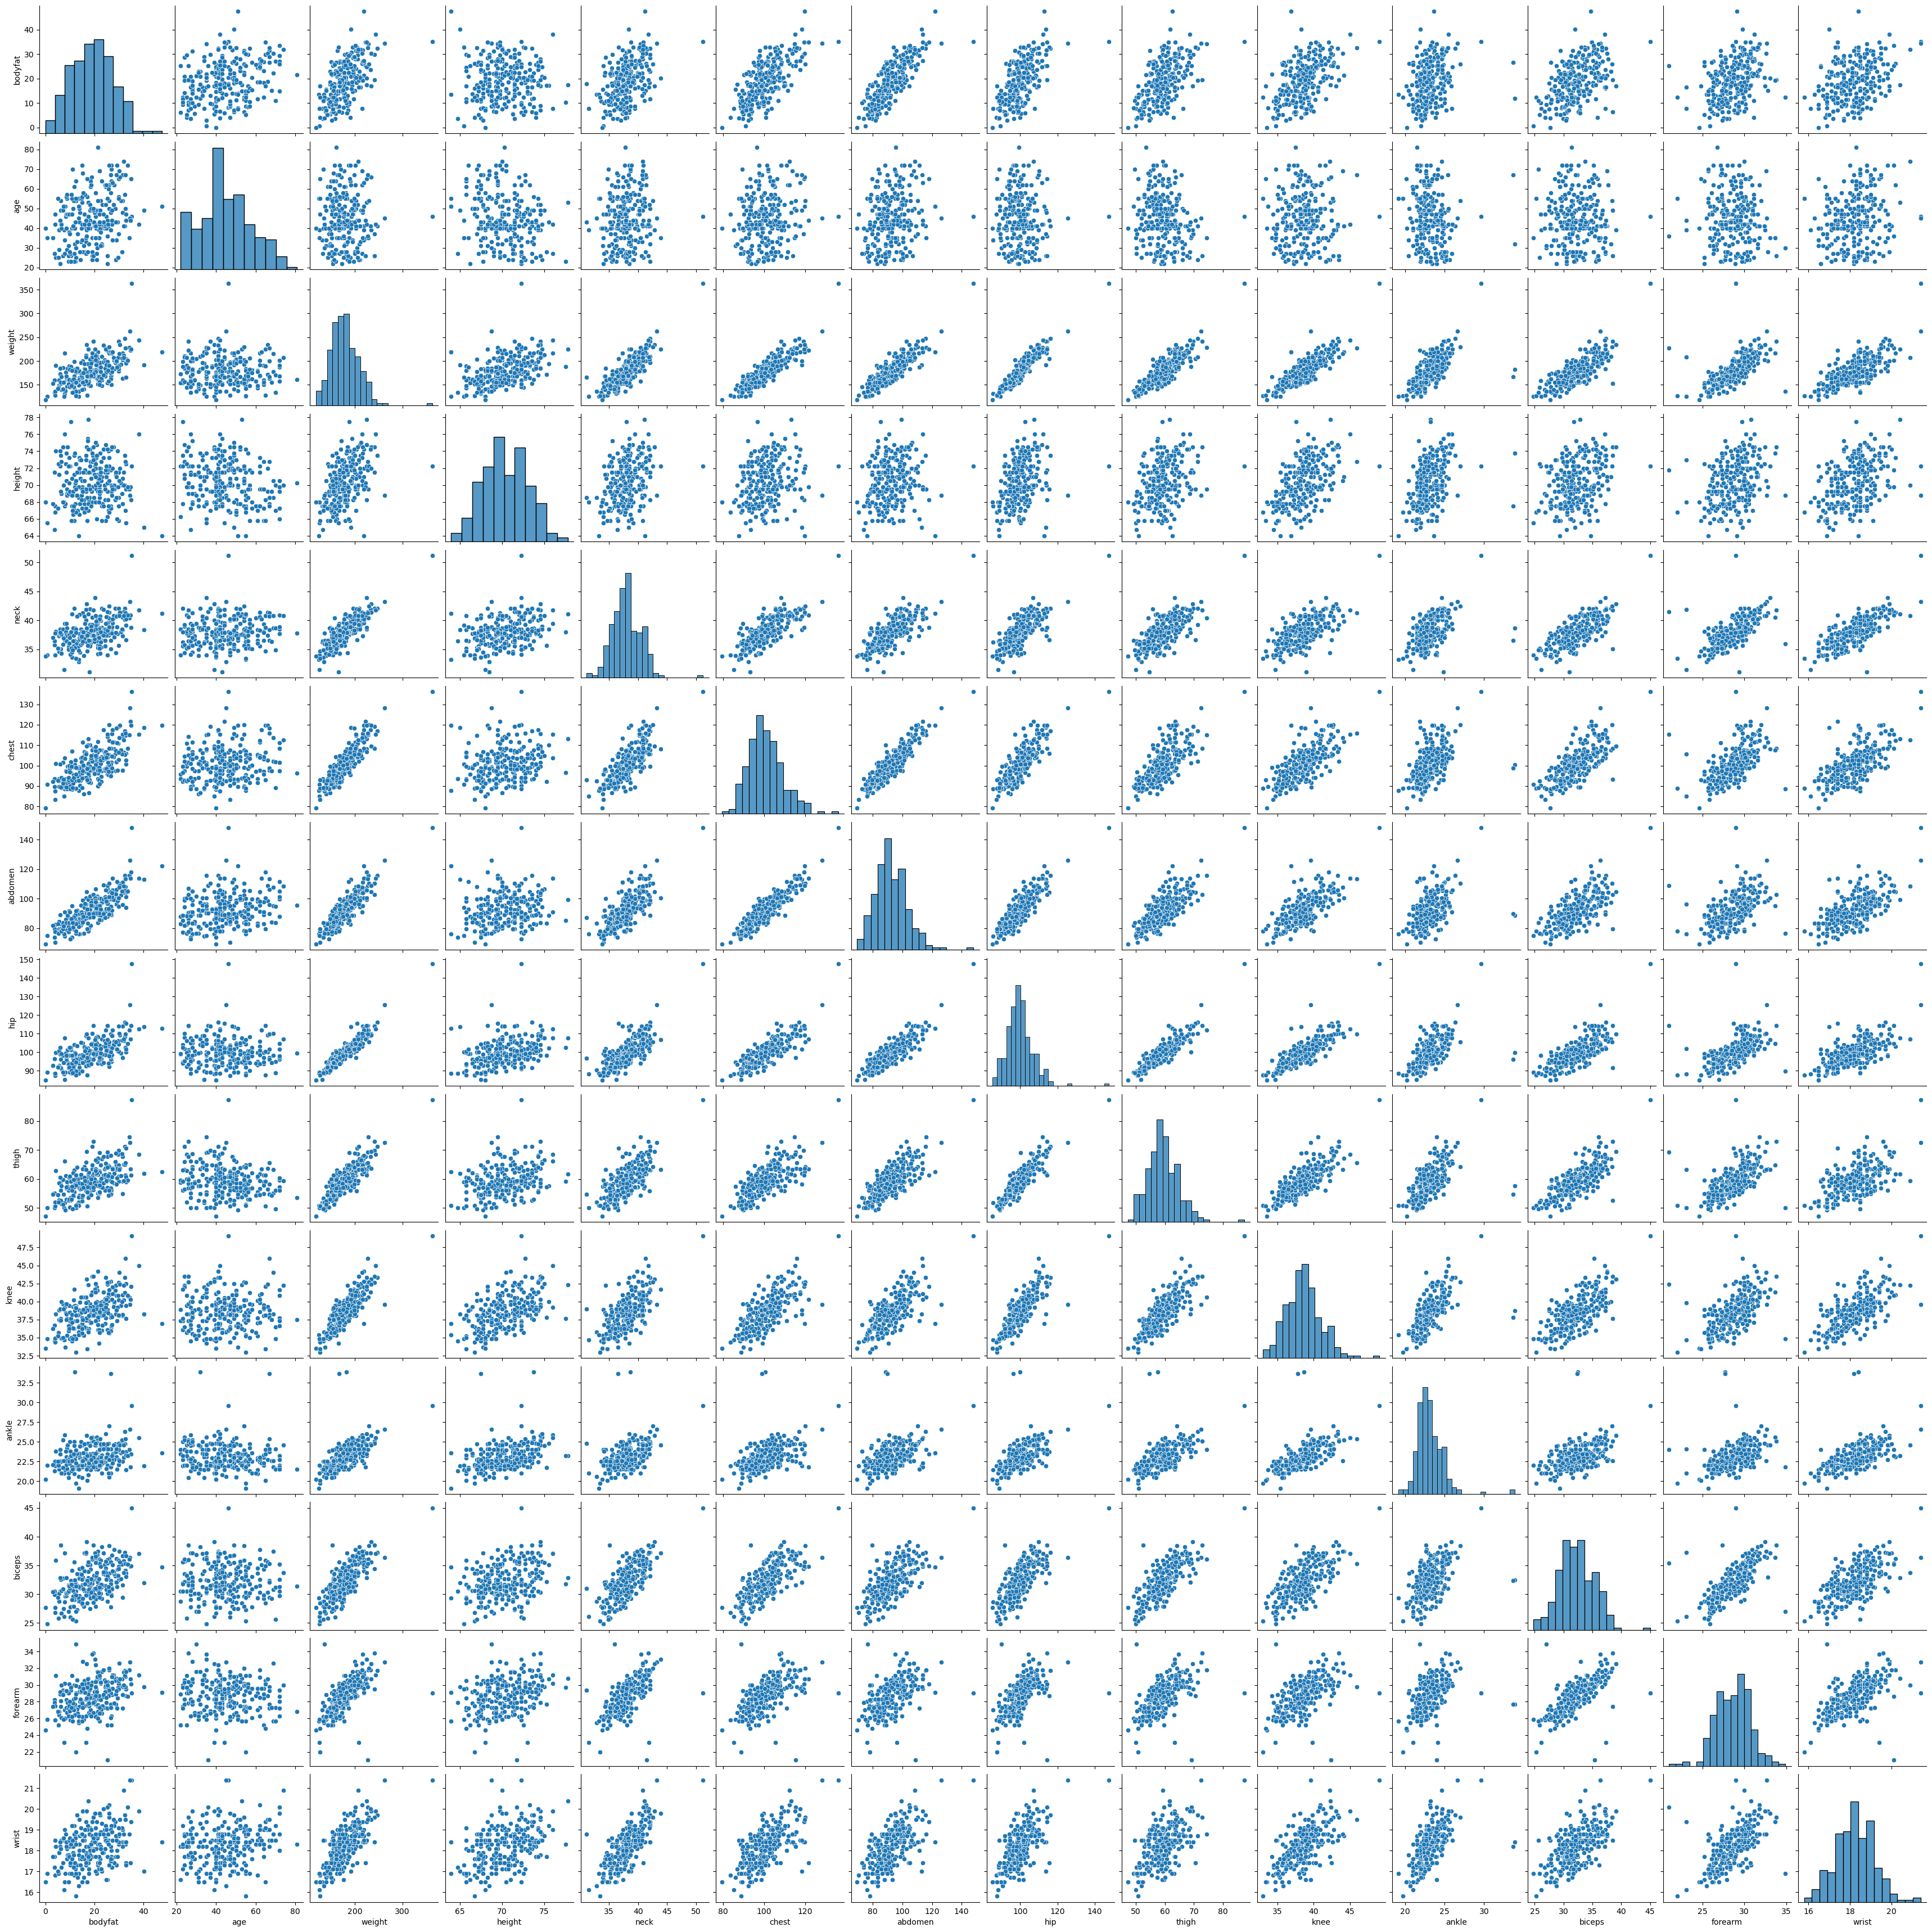

In [5]:
sns.pairplot(bf.to_pandas())

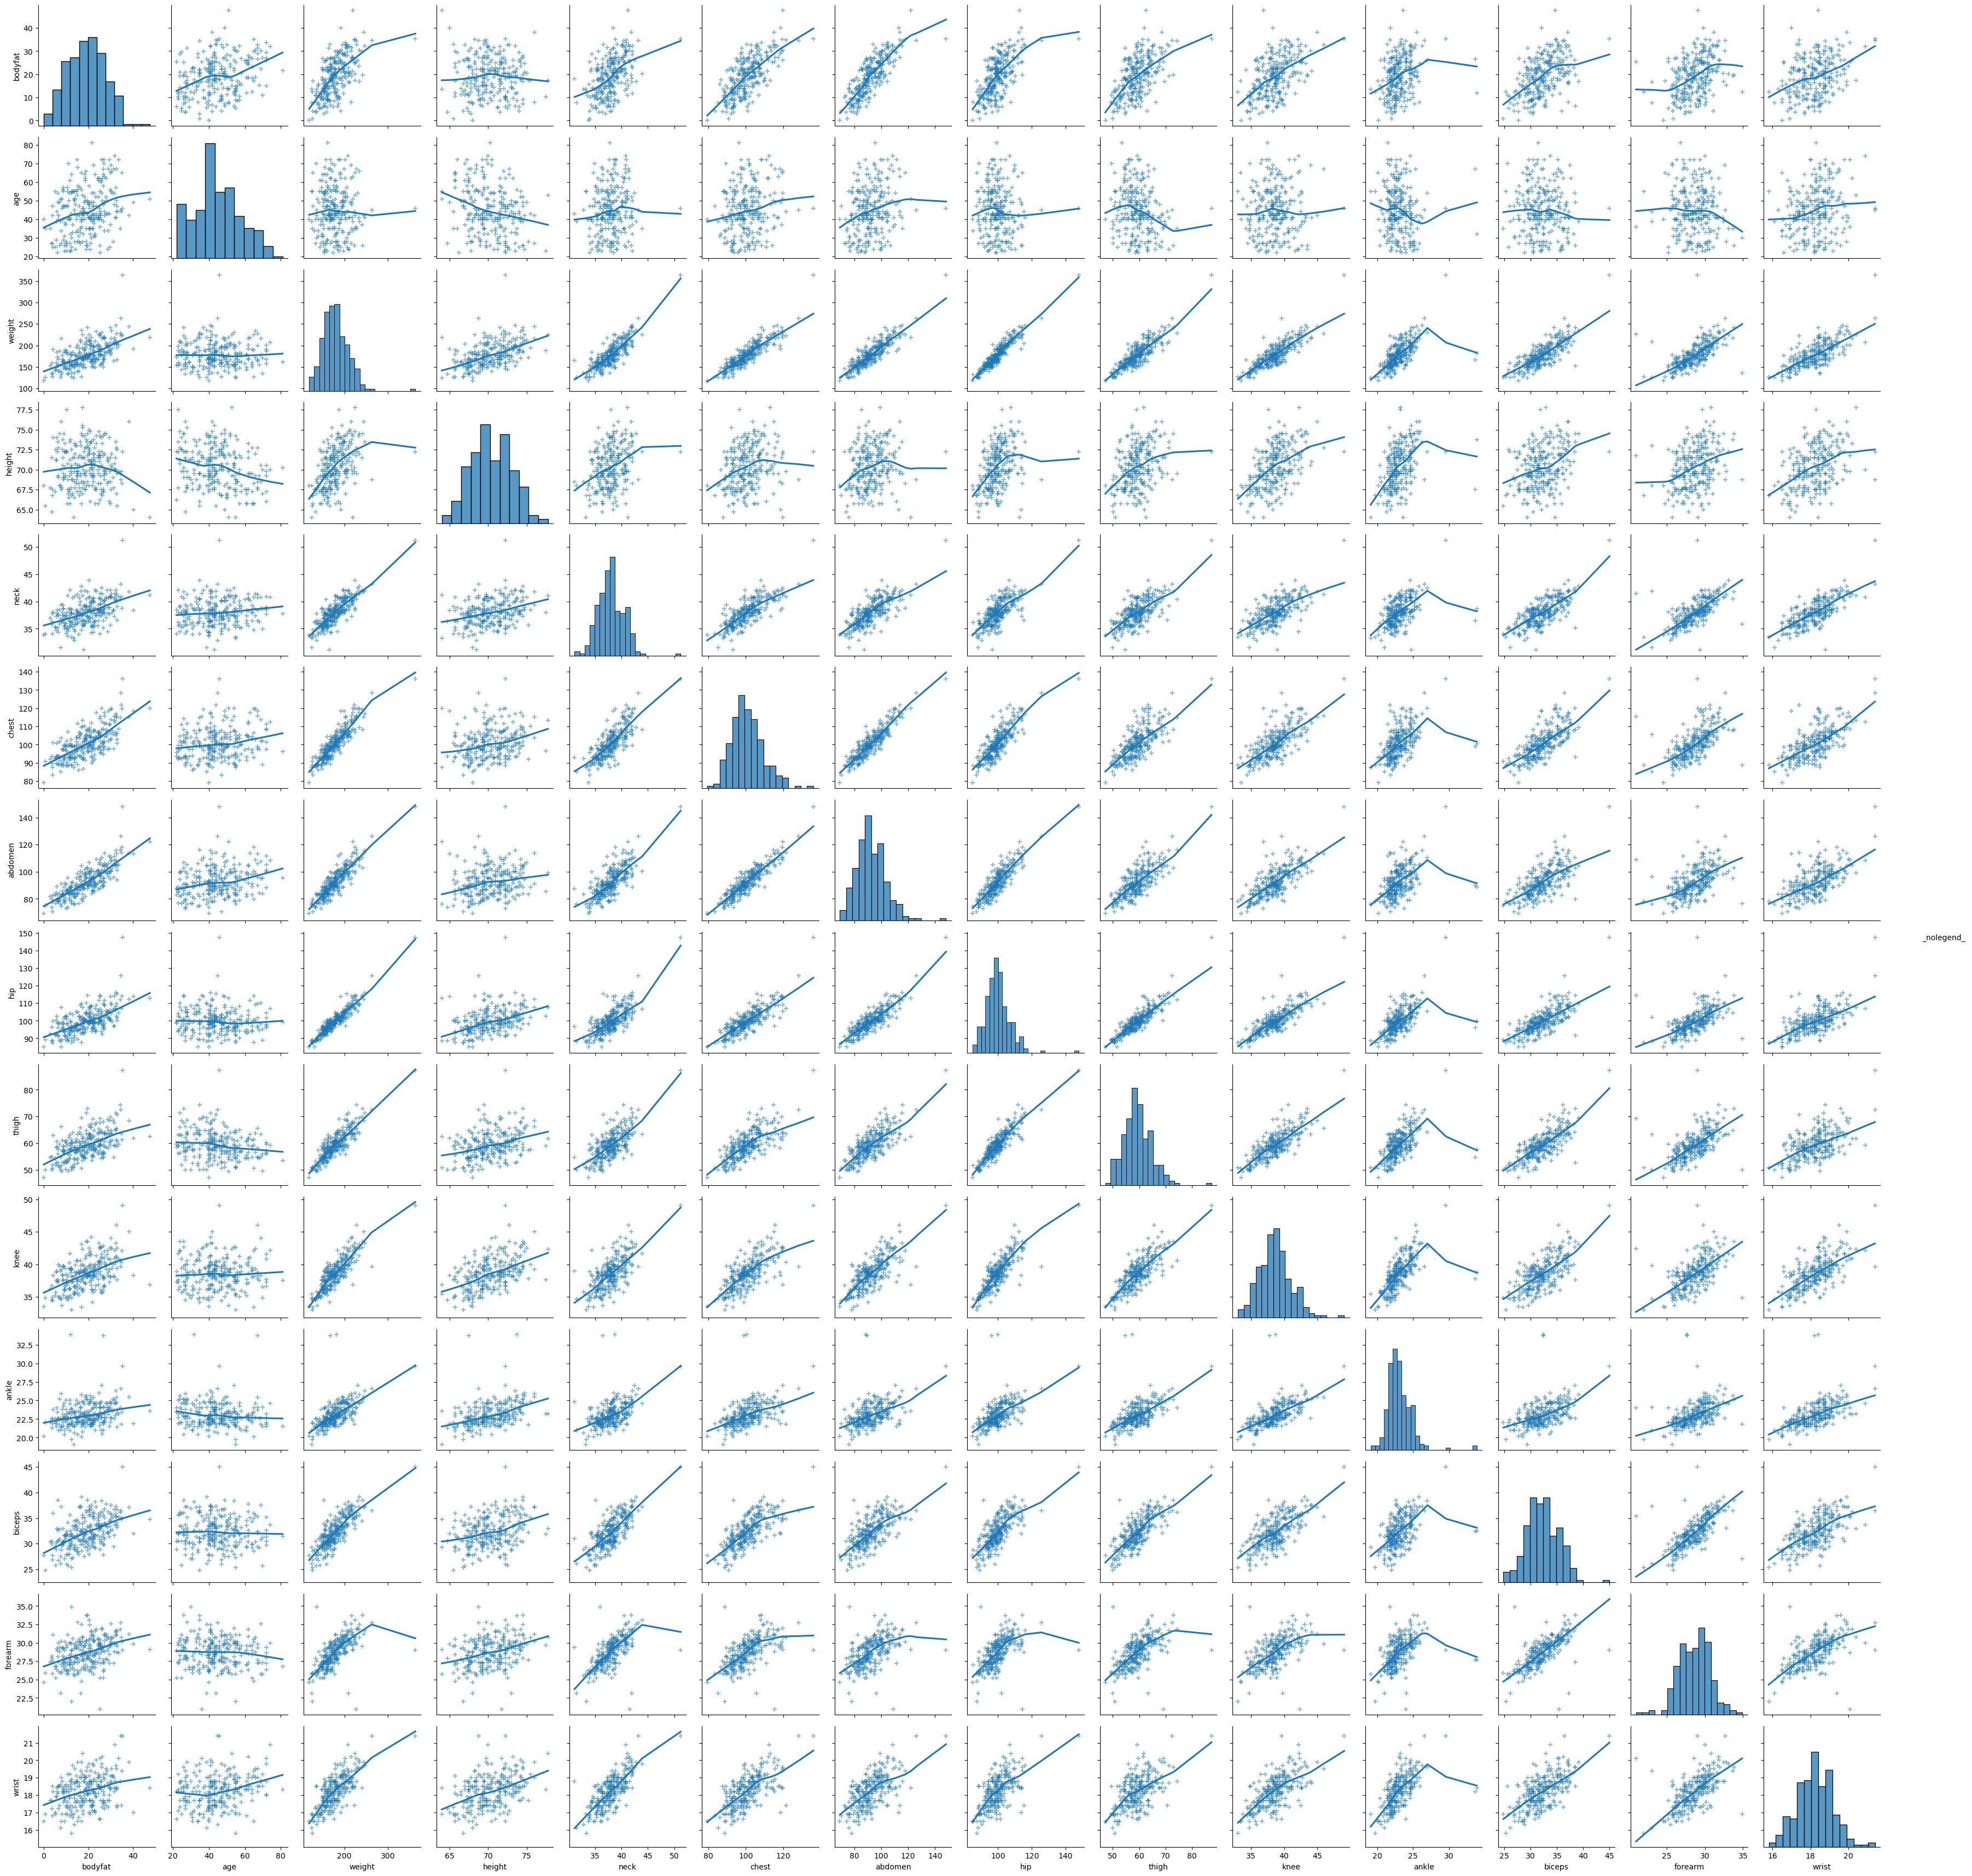

In [6]:
g = sns.PairGrid(bf.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()


### Summary

Density has the strongest correlation with BF with a almost perfect negative correlation. So as more density a individual has the lower body fat that individual will have. However after dropping that variable, weight, chest, abdomin, hip, and thigh are all varibles with the next highest correlation with a somewhat moderate positive correlation with BF. Whereas age, neck, knee, ankle, biceps, forearm, and wrist all have a slightly smaller positive correlation with BF. So for all these predictors, the higher values that they have the more body fat we can expect a person to have. Height is the only predictor that seems to have no correlation with BF indicating that there is almost not relationship between them. 